In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('bank.csv')

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
   age         job  marital  education default  balance housing loan  contact  \
0   59      a

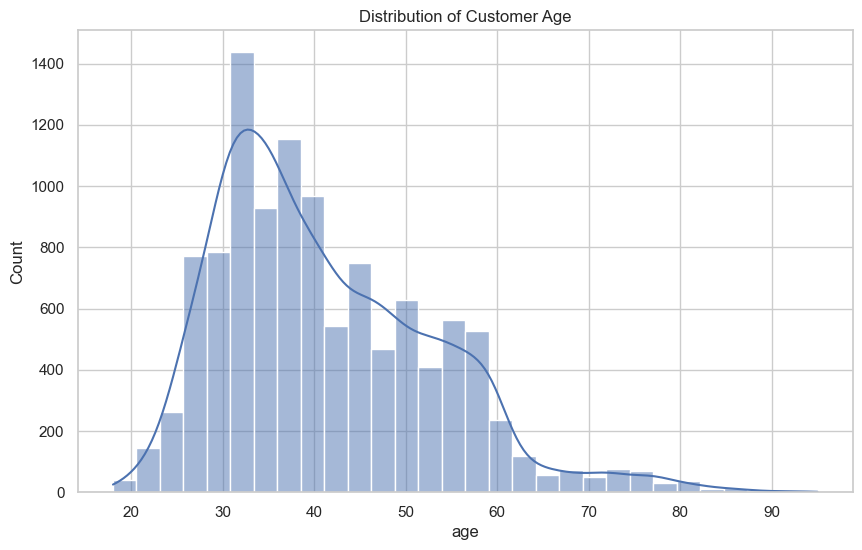

<Figure size 1200x600 with 0 Axes>

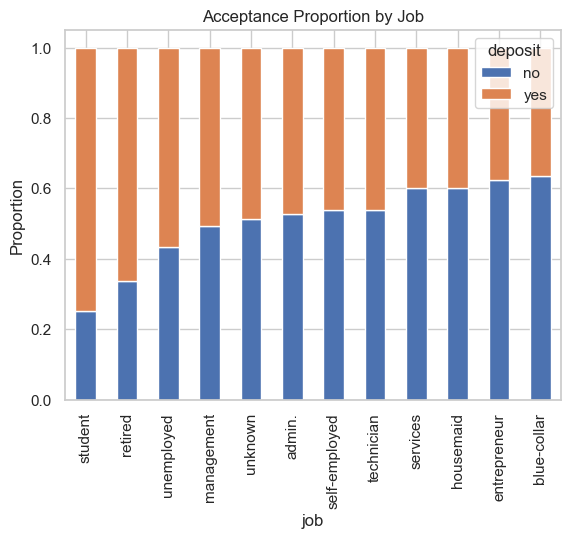

<Figure size 1000x600 with 0 Axes>

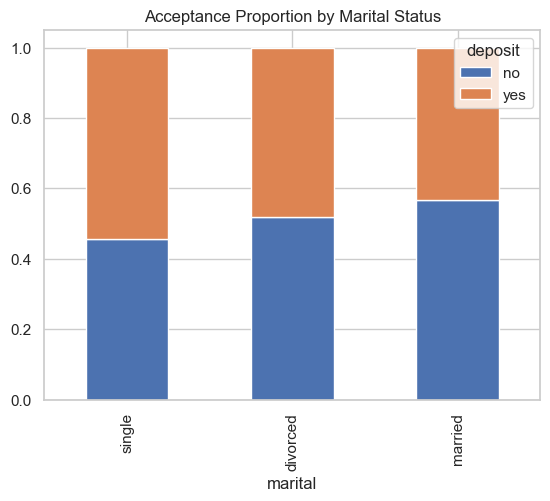

In [2]:
# Set visual style
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# 2. Acceptance Rate by Job
plt.figure(figsize=(12, 6))
job_deposit = df.groupby(['job', 'deposit']).size().unstack()
job_deposit_prop = job_deposit.div(job_deposit.sum(axis=1), axis=0)
job_deposit_prop.sort_values(by='yes', ascending=False).plot(kind='bar', stacked=True)
plt.title('Acceptance Proportion by Job')
plt.ylabel('Proportion')
plt.show()

# 3. Acceptance Rate by Marital Status
plt.figure(figsize=(10, 6))
marital_deposit = df.groupby(['marital', 'deposit']).size().unstack()
marital_deposit_prop = marital_deposit.div(marital_deposit.sum(axis=1), axis=0)
marital_deposit_prop.sort_values(by='yes', ascending=False).plot(kind='bar', stacked=True)
plt.title('Acceptance Proportion by Marital Status')
plt.show()

In [3]:
# Define features (X) and target (y)
# 'deposit' is our target: 'yes' = 1, 'no' = 0
X = df.drop('deposit', axis=1)
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical columns for encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the Decision Tree
# We limit max_depth to avoid overfitting and keep the tree interpretable
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

Model Accuracy: 0.79

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1166
           1       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233


Top 5 Most Important Features:
duration            0.605731
poutcome_success    0.156779
contact_unknown     0.143572
housing_yes         0.036242
month_mar           0.032596
dtype: float64


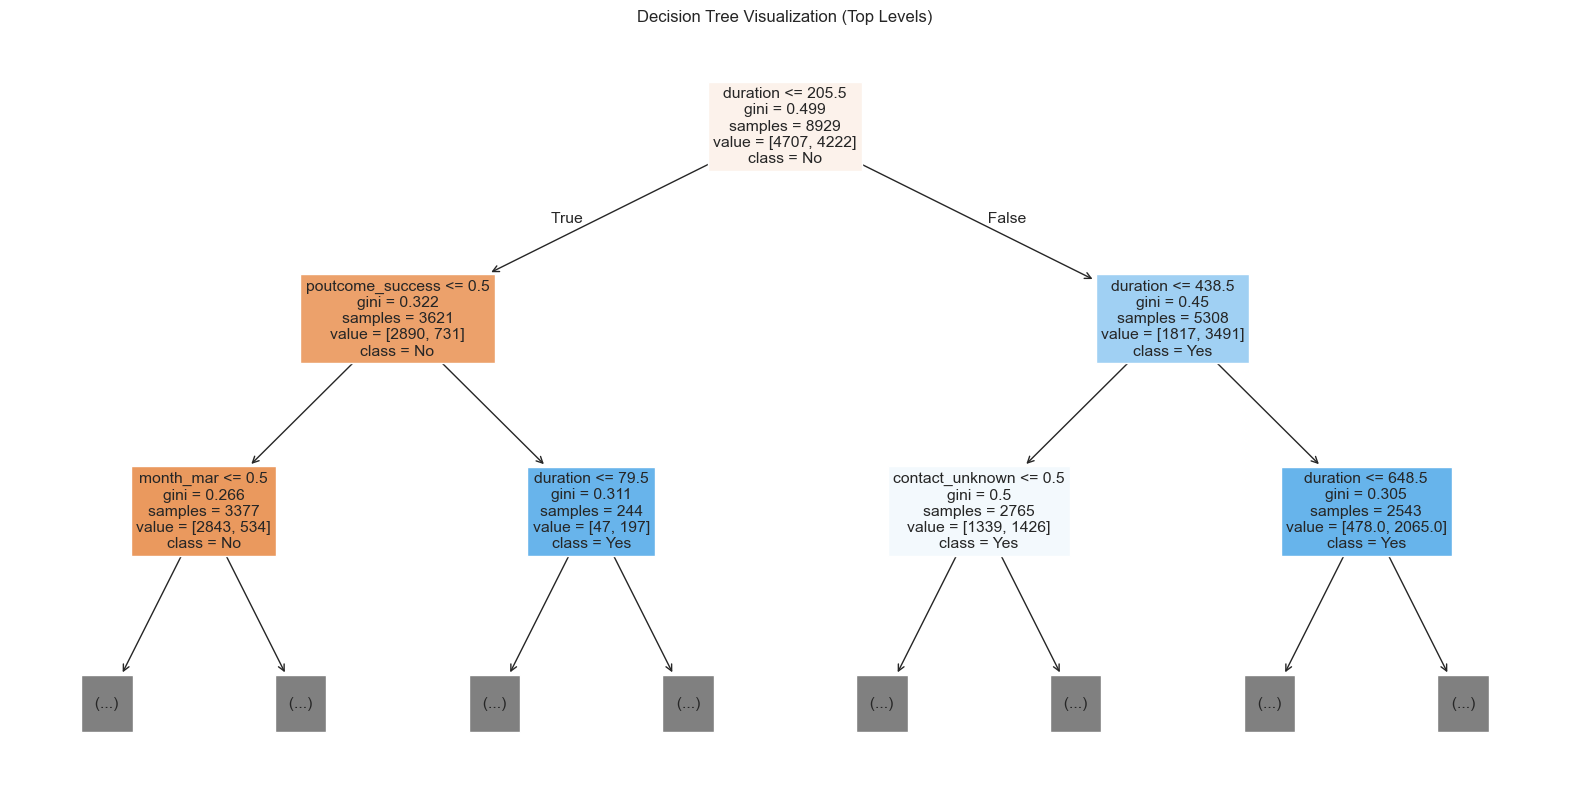

In [5]:
# Print Accuracy and Classification Report
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Identify the most influential features
importances = pd.Series(dt_clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("\nTop 5 Most Important Features:")
print(importances.head(5))

# Visualize the Decision Tree logic
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True, max_depth=2)
plt.title("Decision Tree Visualization (Top Levels)")
plt.show()

In [6]:
# Calculate mean acceptance rate per group
print("Acceptance Rate by Job:\n", df.groupby('job')['deposit'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False))
print("\nAcceptance Rate by Marital Status:\n", df.groupby('marital')['deposit'].apply(lambda x: (x == 'yes').mean()))
print("\nAcceptance Rate by Education:\n", df.groupby('education')['deposit'].apply(lambda x: (x == 'yes').mean()))

Acceptance Rate by Job:
 job
student          0.747222
retired          0.663239
unemployed       0.565826
management       0.507015
unknown          0.485714
admin.           0.473013
self-employed    0.461728
technician       0.460779
services         0.399783
housemaid        0.397810
entrepreneur     0.375000
blue-collar      0.364198
Name: deposit, dtype: float64

Acceptance Rate by Marital Status:
 marital
divorced    0.481052
married     0.433790
single      0.543491
Name: deposit, dtype: float64

Acceptance Rate by Education:
 education
primary      0.394000
secondary    0.447407
tertiary     0.541068
unknown      0.507042
Name: deposit, dtype: float64
